# Autoencoder for dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
# load the dataset
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


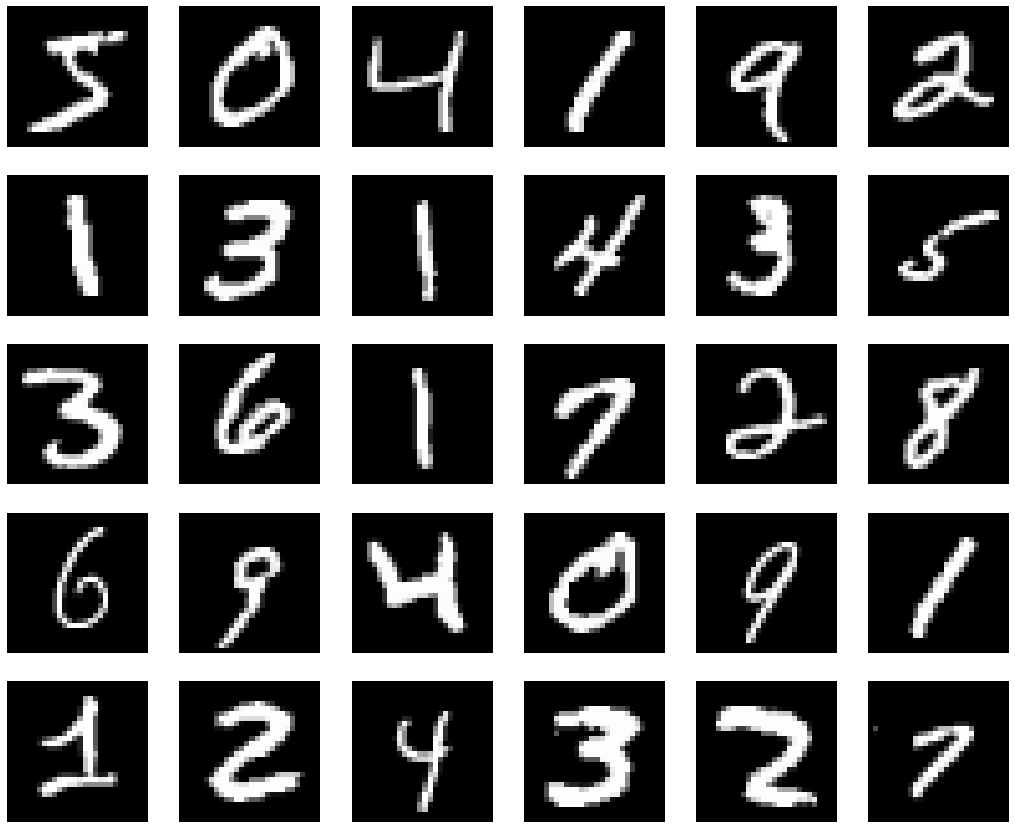

In [3]:
plt.figure(figsize=(18,15))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.axis('off')
plt.show()

In [4]:
xtrain = xtrain/255
xtest = xtest/255

## Modelling the network

In [5]:
xtrain2 = xtrain.reshape(60000,28*28)
xtest2 = xtest.reshape(10000,28*28)
xtrain2.shape,xtest2.shape

((60000, 784), (10000, 784))

In [6]:
# encoder
ip = layers.Input(shape=(28*28,))
de1 = layers.Dense(256,activation='relu')(ip)

# latent space representation
de2 = layers.Dense(64,activation='relu')(de1)

# decoder
de3 = layers.Dense(256,activation='relu')(de2)
op = layers.Dense(784,activation='sigmoid')(de3)

model = models.Model(inputs=ip,outputs=op)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain2,xtrain2,epochs=25,batch_size=520,shuffle=True,validation_data=(xtest2,xtest2))

Epoch 1/25
116/116 [==============================] - 4s 10ms/step - loss: 0.2576 - accuracy: 0.0100 - val_loss: 0.1545 - val_accuracy: 0.0107
Epoch 2/25
116/116 [==============================] - 1s 8ms/step - loss: 0.1319 - accuracy: 0.0111 - val_loss: 0.1150 - val_accuracy: 0.0111
Epoch 3/25
116/116 [==============================] - 1s 8ms/step - loss: 0.1099 - accuracy: 0.0115 - val_loss: 0.1027 - val_accuracy: 0.0118
Epoch 4/25
116/116 [==============================] - 1s 8ms/step - loss: 0.1008 - accuracy: 0.0119 - val_loss: 0.0961 - val_accuracy: 0.0113
Epoch 5/25
116/116 [==============================] - 1s 8ms/step - loss: 0.0950 - accuracy: 0.0123 - val_loss: 0.0914 - val_accuracy: 0.0138
Epoch 6/25
116/116 [==============================] - 1s 8ms/step - loss: 0.0911 - accuracy: 0.0122 - val_loss: 0.0886 - val_accuracy: 0.0134
Epoch 7/25
116/116 [==============================] - 1s 8ms/step - loss: 0.0883 - accuracy: 0.0122 - val_loss: 0.0861 - val_accuracy: 0.0112
Epoch

In [8]:
encoder = models.Model(inputs=ip, outputs = de2)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
Total params: 217,408
Trainable params: 217,408
Non-trainable params: 0
_________________________________________________________________


In [9]:
ypred = encoder.predict(xtest2)
print(ypred.shape)
preds = model.predict(xtest2)
print(preds.shape)

(10000, 64)
(10000, 784)


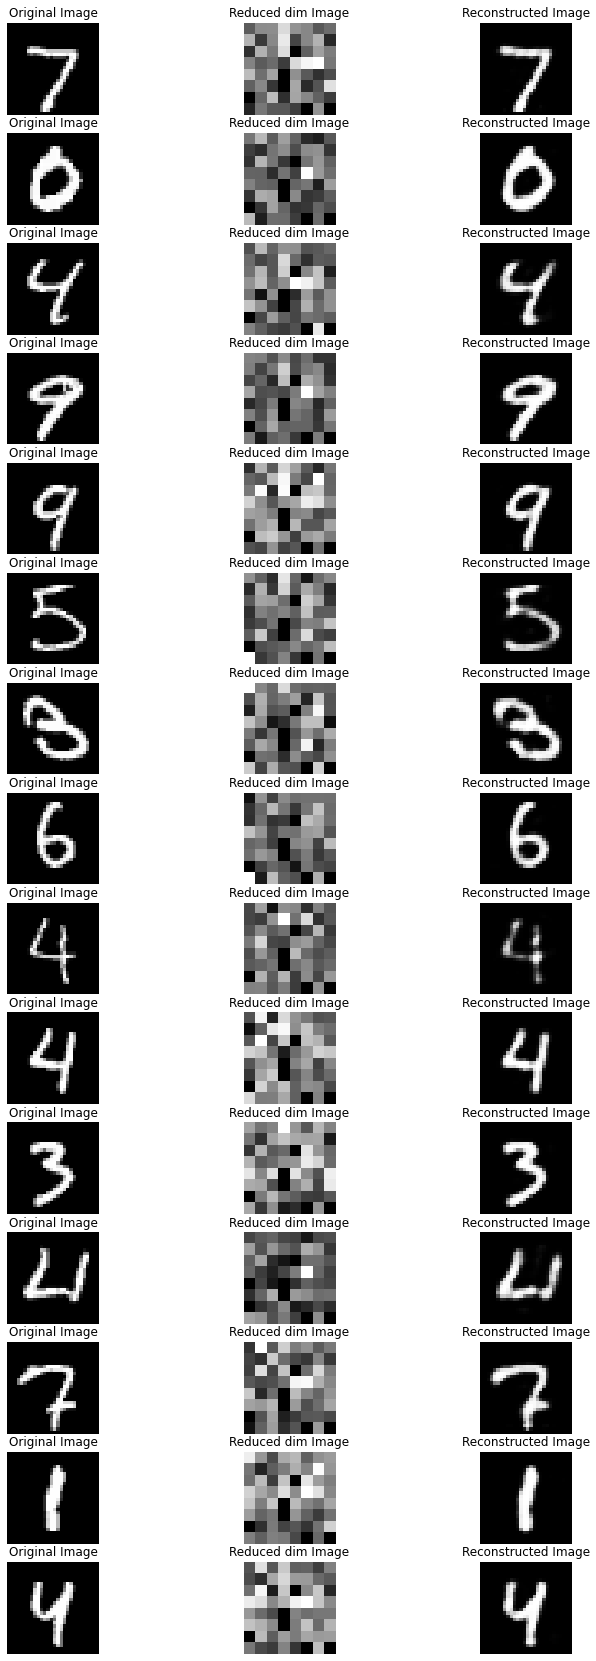

In [10]:
n = 15
plt.figure(figsize=(12,30))
for i in range(0,43,3):
  plt.subplot(15,3,i+1)
  plt.imshow(xtest2[i].reshape(28,28),cmap='gray')
  plt.title("Original Image")
  plt.axis('off')
  plt.subplot(15,3,i+2)
  plt.imshow(ypred[i].reshape(8,8),cmap='gray')
  plt.title("Reduced dim Image")
  plt.axis('off')
  plt.subplot(15,3,i+3)
  plt.imshow(preds[i].reshape(28,28),cmap='gray')
  plt.title("Reconstructed Image")
  plt.axis('off')
plt.show()
  

## Convolutional Autoencoders

In [11]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [13]:
from tensorflow.keras import models,layers

In [14]:

# encoder
ip = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3),padding='same',strides=(1,1),activation='relu')(ip)
c2 = layers.Conv2D(32,(3,3),padding='same',strides=(2,2),activation='relu')(c1)

# latent space
c3 = layers.Conv2D(5,(3,3),padding='same',strides=(1,1),activation='relu')(c2)

# Deocder section
c4 = layers.Conv2DTranspose(32,(3,3),padding='same',strides=(2,2),activation='relu')(c3)
c5 = layers.Conv2D(16,(3,3),padding='same',strides=(1,1),activation='relu')(c4)
op = layers.Conv2D(1,(3,3),padding='same',activation='sigmoid')(c5)

model = models.Model(inputs=ip,outputs=op)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 5)         1445      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 28, 28, 32)        1472      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)         145 

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,xtrain,epochs=25,batch_size=520,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/25
116/116 [==============================] - 35s 63ms/step - loss: 0.2295 - accuracy: 0.8073 - val_loss: 0.0743 - val_accuracy: 0.8142
Epoch 2/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0702 - accuracy: 0.8154 - val_loss: 0.0669 - val_accuracy: 0.8145
Epoch 3/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0663 - accuracy: 0.8155 - val_loss: 0.0650 - val_accuracy: 0.8145
Epoch 4/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0650 - accuracy: 0.8155 - val_loss: 0.0641 - val_accuracy: 0.8145
Epoch 5/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0642 - accuracy: 0.8155 - val_loss: 0.0635 - val_accuracy: 0.8145
Epoch 6/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0637 - accuracy: 0.8155 - val_loss: 0.0631 - val_accuracy: 0.8145
Epoch 7/25
116/116 [==============================] - 7s 58ms/step - loss: 0.0633 - accuracy: 0.8155 - val_loss: 0.0627 - val_accuracy: 0.814

In [16]:
encoder = models.Model(inputs=ip, outputs = c3)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 5)         1445      
Total params: 6,245
Trainable params: 6,245
Non-trainable params: 0
_________________________________________________________________


In [17]:
ypred = encoder.predict(xtest)
print(ypred.shape)
preds = model.predict(xtest)
print(preds.shape)

(10000, 14, 14, 5)
(10000, 28, 28, 1)


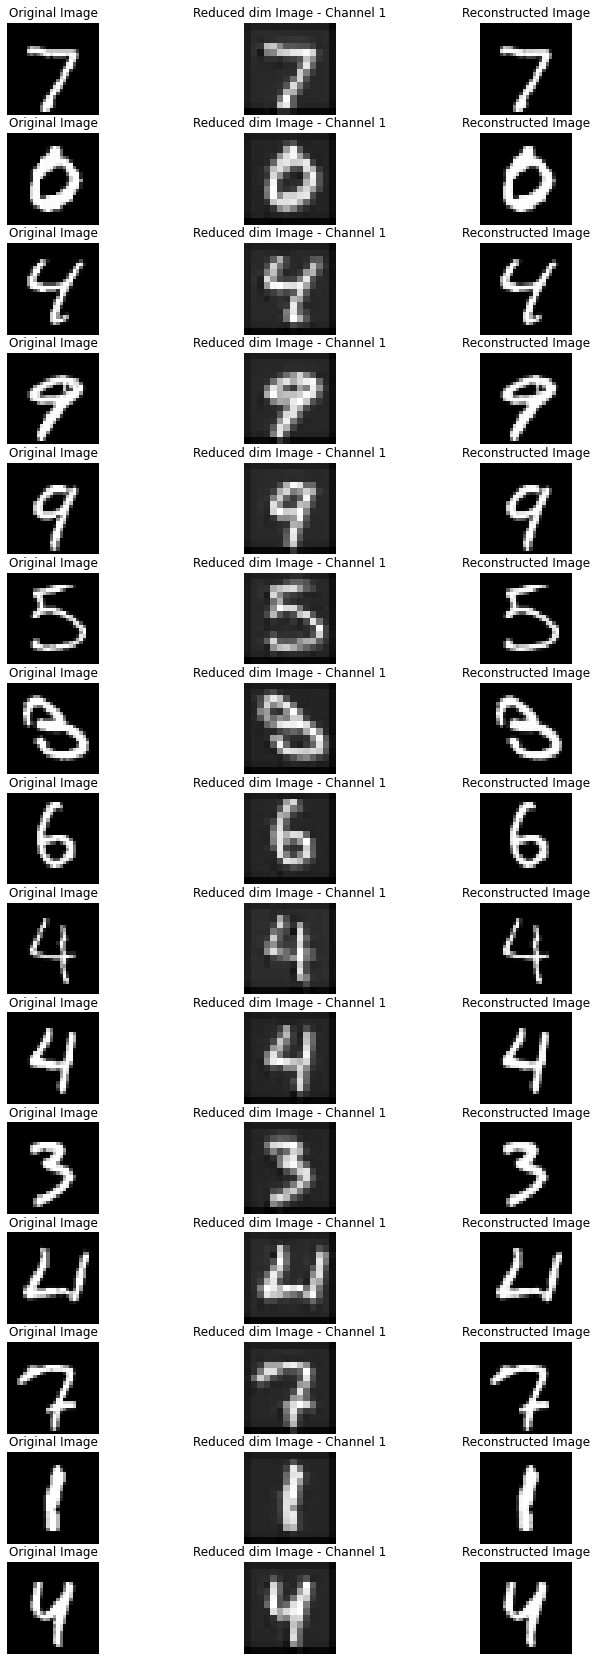

In [18]:
n = 15
plt.figure(figsize=(12,30))
for i in range(0,43,3):
  plt.subplot(15,3,i+1)
  plt.imshow(xtest[i].reshape(28,28),cmap='gray')
  plt.title("Original Image")
  plt.axis('off')
  plt.subplot(15,3,i+2)
  plt.imshow(ypred[i,:,:,0].reshape(14,14),cmap='gray')
  plt.title("Reduced dim Image - Channel 1")
  plt.axis('off')
  plt.subplot(15,3,i+3)
  plt.imshow(preds[i].reshape(28,28),cmap='gray')
  plt.title("Reconstructed Image")
  plt.axis('off')
plt.show()
  